# POS Tagging using Modified Viterbi

### In this assignment, we'll apply some techniques to improve Vanilla Viterbi Algorithm

#### Following steps would be followed as part of it :

1. Pos Tagging based on Vanilla Viterbi Algorithm
2. Viterbi Modification-Technique 1
      * Transition probability is considered in case of unknown words
      * The above approach is modified to consider transition probability weighted by tag occurrence probability in training set
3. Viterbi Modification-Technique 2
      * Backoff to a Rule Based Tagger in case of an unknown word
      * The above technique is modified by using transition probability in approach 2 above if rule based tagger returns default noun tag ('NN')
4. The modified Viterbi algorithms are first tested on sample test data and a comparative study is done amongst them
5. The final algorithm and Vanilla Viterbi Algorithm are the tested on whole testing data and a comparative study is done  between the two

### Data Preparation

In [1]:
# Importing required libraries

import nltk, re, pprint
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pprint, time
import random
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
import codecs

In [2]:
# downloading the universal tagset

nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\Naveen\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [3]:
# reading the Treebank tagged sentences

nltk_data = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))

In [4]:
# printing first 10 tagged sentences

print(nltk_data[0:10])

[[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ('61', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), (',', '.'), ('will', 'VERB'), ('join', 'VERB'), ('the', 'DET'), ('board', 'NOUN'), ('as', 'ADP'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('Nov.', 'NOUN'), ('29', 'NUM'), ('.', '.')], [('Mr.', 'NOUN'), ('Vinken', 'NOUN'), ('is', 'VERB'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Elsevier', 'NOUN'), ('N.V.', 'NOUN'), (',', '.'), ('the', 'DET'), ('Dutch', 'NOUN'), ('publishing', 'VERB'), ('group', 'NOUN'), ('.', '.')], [('Rudolph', 'NOUN'), ('Agnew', 'NOUN'), (',', '.'), ('55', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), ('and', 'CONJ'), ('former', 'ADJ'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Consolidated', 'NOUN'), ('Gold', 'NOUN'), ('Fields', 'NOUN'), ('PLC', 'NOUN'), (',', '.'), ('was', 'VERB'), ('named', 'VERB'), ('*-1', 'X'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('of', 'ADP'), ('this', 'DET'), ('British', 'ADJ'), ('industrial', 'ADJ'), ('

In [5]:
# chekcing length(no. of sentences) in nltk_data

len(nltk_data)

3914

In [6]:
# Splitting into train and test with train =95% and test =5%

train_set, test_set = train_test_split(nltk_data,test_size=0.05,random_state=101)

In [7]:
# checking length of train_set and test_set

print("Length of train set is :", len(train_set))
print("Length of test set is:", len(test_set))

Length of train set is : 3718
Length of test set is: 196


In [8]:
# Getting list of train and test tagged words

train_tagged_words = [tup for sent in train_set for tup in sent]
test_tagged_words = [tup[0] for sent in test_set for tup in sent]

In [9]:
# Get the length of the total tagged words in training set and test set

print(len(train_tagged_words))
print(len(test_tagged_words))

95547
5129


In [10]:
# checking train_tagged_words

train_tagged_words

[('Reliance', 'NOUN'),
 ('confirmed', 'VERB'),
 ('the', 'DET'),
 ('filing', 'NOUN'),
 ('but', 'CONJ'),
 ('would', 'VERB'),
 ("n't", 'ADV'),
 ('elaborate', 'VERB'),
 ('.', '.'),
 ('*', 'X'),
 ('Encouraging', 'VERB'),
 ('long-term', 'ADJ'),
 ('investing', 'NOUN'),
 ('.', '.'),
 ('Because', 'ADP'),
 ('of', 'ADP'),
 ('the', 'DET'),
 ('rulings', 'NOUN'),
 (',', '.'),
 ('the', 'DET'),
 ('Commerce', 'NOUN'),
 ('Department', 'NOUN'),
 ('will', 'VERB'),
 ('continue', 'VERB'),
 ('*-1', 'X'),
 ('to', 'PRT'),
 ('investigate', 'VERB'),
 ('complaints', 'NOUN'),
 ('*ICH*-2', 'X'),
 ('by', 'ADP'),
 ('U.S.', 'NOUN'),
 ('sweater', 'NOUN'),
 ('makers', 'NOUN'),
 ('that', 'ADP'),
 ('the', 'DET'),
 ('imports', 'NOUN'),
 ('are', 'VERB'),
 ('reaching', 'VERB'),
 ('the', 'DET'),
 ('U.S.', 'NOUN'),
 ('at', 'ADP'),
 ('unfairly', 'ADV'),
 ('low', 'ADJ'),
 ('prices', 'NOUN'),
 ('in', 'ADP'),
 ('violation', 'NOUN'),
 ('of', 'ADP'),
 ('the', 'DET'),
 ('U.S.', 'NOUN'),
 ('anti-dumping', 'ADJ'),
 ('act', 'NOUN'),
 ('

In [11]:
# checking test_tagged_words

test_tagged_words

['The',
 'company',
 'said',
 '0',
 'it',
 'is',
 'in',
 'the',
 'process',
 'of',
 '*',
 'phasing',
 'out',
 'John',
 'Deere',
 ',',
 'its',
 'current',
 'source',
 'of',
 'production',
 'for',
 'midsized',
 'motor',
 'home',
 'chassis',
 '.',
 'Douglas',
 'Madison',
 ',',
 'a',
 'corporate',
 'trader',
 'with',
 'Bank',
 'of',
 'America',
 'in',
 'Los',
 'Angeles',
 ',',
 'traced',
 'the',
 'dollar',
 "'s",
 'recent',
 'solid',
 'performance',
 'against',
 'the',
 'yen',
 'to',
 'purchases',
 'of',
 'securities',
 'by',
 'Japanese',
 'insurance',
 'companies',
 'and',
 'trust',
 'banks',
 'and',
 'the',
 'sense',
 'that',
 'another',
 'wave',
 'of',
 'investment',
 'is',
 'waiting',
 'in',
 'the',
 'wings',
 '.',
 'Ralston',
 'said',
 '0',
 'its',
 'Eveready',
 'battery',
 'unit',
 'was',
 'hurt',
 '*-1',
 'by',
 'continuing',
 'economic',
 'problems',
 'in',
 'South',
 'America',
 '.',
 'A',
 'nickname',
 'for',
 'measures',
 '0',
 '*',
 'to',
 'stop',
 'the',
 'market',
 'from',
 '

In [12]:
# checking the first 10 tokens/words in train_tagged_words 

tokens = [pair[0] for pair in train_tagged_words]
tokens[:10]

['Reliance',
 'confirmed',
 'the',
 'filing',
 'but',
 'would',
 "n't",
 'elaborate',
 '.',
 '*']

In [13]:
# vocabulary - Get the total unique words in the training set

V = set(tokens)
print(len(V))

12100


In [14]:
# number of tags in the training corpus

T = set([pair[1] for pair in train_tagged_words])
len(T)

12

In [15]:
# priting the tags present in training corpus

print(T)

{'ADV', 'X', 'PRT', 'PRON', 'CONJ', 'ADJ', 'DET', 'ADP', '.', 'VERB', 'NOUN', 'NUM'}


## POS Tagging Algorithm - HMM

We'll use the HMM algorithm to tag the words. Given a sequence of words to be tagged, the task is to assign the most probable tag to the word. 

In other words, to every word w, assign the tag t that maximises the likelihood P(t/w). Since P(t/w) = P(w/t). P(t) / P(w), after ignoring P(w), we have to compute P(w/t) and P(t).


**Emission Probability** P(w/t) is basically the probability that given a tag (say NN), what is the probability of it being w (say 'building'). This can be computed by computing the fraction of all NNs which are equal to w, i.e. 

P(w/t) = count(w, t) / count(t). 


The term P(t) is the probability of tag t (**Transition Probability**), and in a tagging task, we assume that a tag will depend only on the previous tag. In other words, the probability of a tag being NN will depend only on the previous tag t(n-1). So for e.g. if t(n-1) is a JJ, then t(n) is likely to be an NN since adjectives often precede a noun (blue coat, tall building etc.).


Given the penn treebank tagged dataset, we can compute the two terms P(w/t) and P(t) and store them in two large matrices. The matrix of P(w/t) will be sparse, since each word will not be seen with most tags ever, and those terms will thus be zero. 

### Emission Probabilities

In [16]:
# computing P(w/t) and storing in T x V matrix

t = len(T)
v = len(V)
w_given_t = np.zeros((t, v))

In [17]:
# compute word given tag: Emission Probability

def word_given_tag(word, tag, train_bag = train_tagged_words):
    tag_list = [pair for pair in train_bag if pair[1]==tag]
    count_tag = len(tag_list)
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]
    count_w_given_tag = len(w_given_tag_list)
    
    return (count_w_given_tag, count_tag)

### Transition Probabilities

In [18]:
# compute tag given tag: tag2(t2) given tag1 (t1), i.e. Transition Probability

def t2_given_t1(t2, t1, train_bag = train_tagged_words):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])
    count_t2_t1 = 0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2:
            count_t2_t1 += 1
    return (count_t2_t1, count_t1)

In [19]:
# creating t x t transition matrix of tags
# each column is t2, each row is t1
# thus M(i, j) represents P(tj given ti)

tags_matrix = np.zeros((len(T), len(T)), dtype='float32')
for i, t1 in enumerate(list(T)):
    for j, t2 in enumerate(list(T)): 
        tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]

In [20]:
tags_matrix

array([[8.04902315e-02, 2.31864862e-02, 1.42431268e-02, 1.49055980e-02,
        6.95594586e-03, 1.29181847e-01, 6.98906928e-02, 1.18582316e-01,
        1.37131497e-01, 3.43491226e-01, 3.14673744e-02, 3.04736663e-02],
       [2.49840859e-02, 7.63844699e-02, 1.85232341e-01, 5.55378757e-02,
        1.06619988e-02, 1.71865057e-02, 5.47422022e-02, 1.42584339e-01,
        1.63590074e-01, 2.03851044e-01, 6.23806491e-02, 2.86441762e-03],
       [1.02141676e-02, 1.35090612e-02, 1.64744642e-03, 1.77924223e-02,
        2.30642501e-03, 8.30313042e-02, 9.78583172e-02, 2.00988464e-02,
        4.38220762e-02, 4.05271828e-01, 2.47775942e-01, 5.66721596e-02],
       [3.40735056e-02, 8.99693742e-02, 1.30168451e-02, 7.65696773e-03,
        5.35987737e-03, 7.31240436e-02, 9.95405857e-03, 2.29709037e-02,
        4.09647785e-02, 4.85451758e-01, 2.10949466e-01, 6.50842255e-03],
       [5.53231053e-02, 8.83310102e-03, 4.64900024e-03, 5.81125058e-02,
        4.64900048e-04, 1.18084610e-01, 1.21338911e-01, 5.25

In [21]:
# convert the matrix to a df for better readability

tags_df = pd.DataFrame(tags_matrix, columns = list(T), index=list(T))

In [22]:
tags_df

,ADV,X,PRT,PRON,CONJ,ADJ,DET,ADP,.,VERB,NOUN,NUM
ADV,0.080490,0.023186,0.014243,0.014906,0.006956,0.129182,0.069891,0.118582,0.137131,0.343491,0.031467,0.030474
X,0.024984,0.076384,0.185232,0.055538,0.010662,0.017187,0.054742,0.142584,0.163590,0.203851,0.062381,0.002864
PRT,0.010214,0.013509,0.001647,0.017792,0.002306,0.083031,0.097858,0.020099,0.043822,0.405272,0.247776,0.056672
PRON,0.034074,0.089969,0.013017,0.007657,0.005360,0.073124,0.009954,0.022971,0.040965,0.485452,0.210949,0.006508
CONJ,0.055323,0.008833,0.004649,0.058113,0.000465,0.118085,0.121339,0.052534,0.034868,0.156671,0.349140,0.039981
ADJ,0.004778,0.021091,0.010710,0.000330,0.016971,0.066403,0.004943,0.078267,0.063931,0.011699,0.699621,0.021256
DET,0.012438,0.045405,0.000242,0.003744,0.000483,0.204323,0.005676,0.009540,0.017993,0.039850,0.638087,0.022220
ADP,0.014006,0.034427,0.001390,0.070031,0.000962,0.107024,0.324709,0.016893,0.039025,0.008340,0.320967,0.062226
.,0.052324,0.026971,0.002427,0.066349,0.057538,0.043963,0.173335,0.091342,0.093320,0.089095,0.222242,0.081003
VERB,0.081952,0.217506,0.030674,0.035786,0.005577,0.064988,0.134392,0.092022,0.034934,0.169249,0.110070,0.022851


In [23]:
tags_df.loc['.', :]

ADV     0.052324
X       0.026971
PRT     0.002427
PRON    0.066349
CONJ    0.057538
ADJ     0.043963
DET     0.173335
ADP     0.091342
.       0.093320
VERB    0.089095
NOUN    0.222242
NUM     0.081003
Name: ., dtype: float32

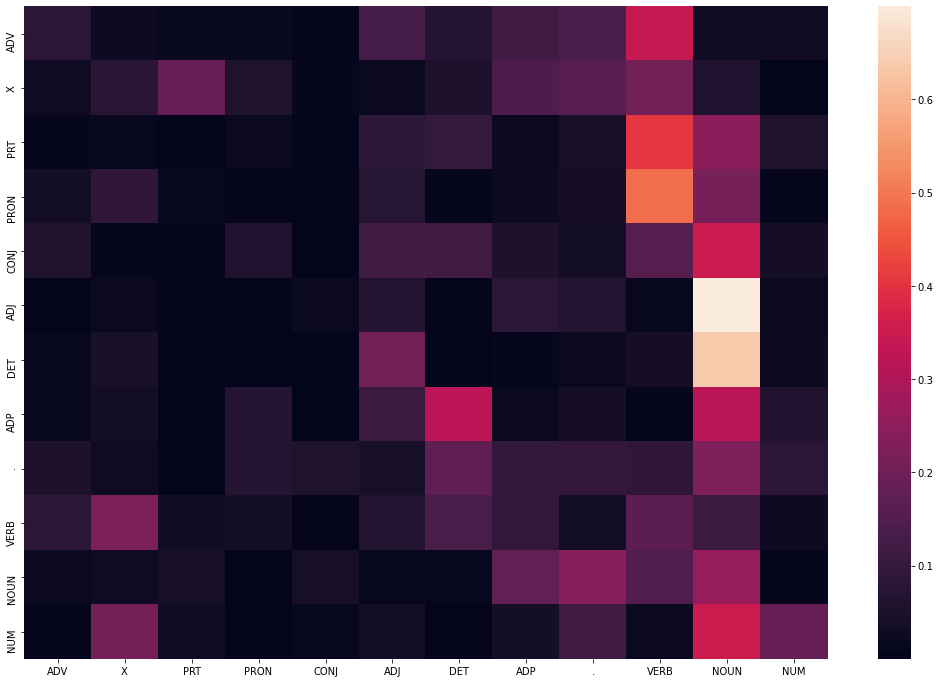

In [24]:
# heatmap of tags matrix
# T(i, j) means P(tag j given tag i)

plt.figure(figsize=(18, 12))
sns.heatmap(tags_df)
plt.show()

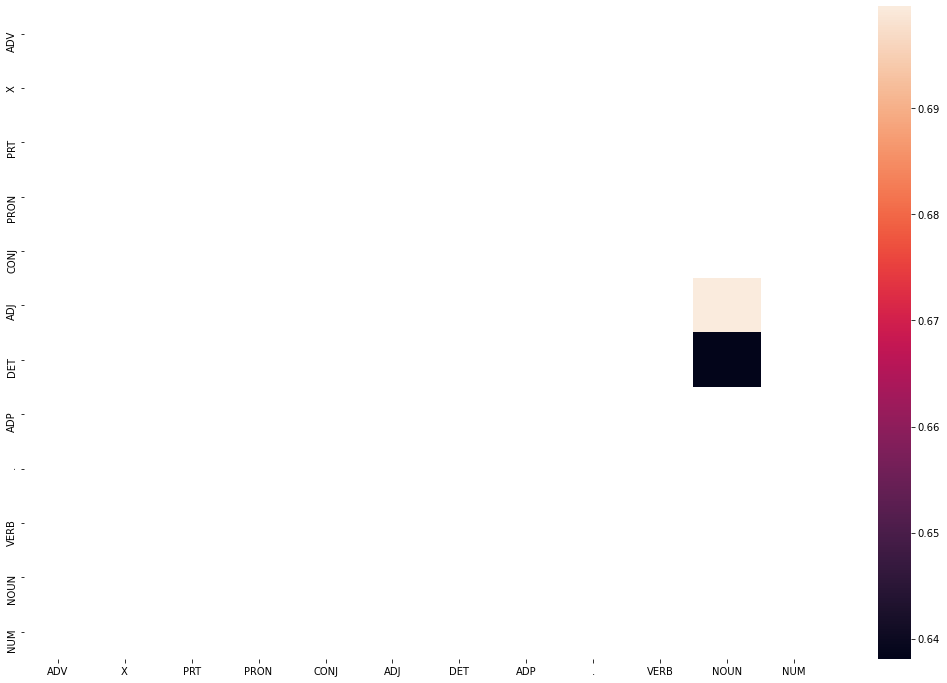

In [25]:
# frequent tags
# filter the df to get P(t2, t1) > 0.5

tags_frequent = tags_df[tags_df>0.5]
plt.figure(figsize=(18, 12))
sns.heatmap(tags_frequent)
plt.show()

## Building the Vanilla Viterbi based POS tagger

1. Let's now use the computed probabilities P(w, tag) and P(t2, t1) to assign tags to each word in the document. 
2. We'll run through each word w and compute P(tag/w)=P(w/tag).P(tag) for each tag in the tag set, and then assign the tag having the max P(tag/w).

3. We'll store the assigned tags in a list of tuples, similar to the list 'train_tagged_words'. Each tuple will be a (token, assigned_tag). 
4. As we progress further in the list, each tag to be assigned will use the tag of the previous token.

Note: P(tag|start) = P(tag|'.') 

In [26]:
# checking the total length of tagged words in training corpus

len(train_tagged_words)

95547

In [27]:
# Viterbi Heuristic

def Viterbi(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))

### Evaluating Vanilla Viterbi on Test Set

In [28]:

# Running on entire test dataset would take more than 3-4hrs. 
# Let's test our Viterbi algorithm on a few sample sentences of test dataset


random.seed(1234)

# choose random 5 sents
rndom = [random.randint(1,len(test_set)) for x in range(5)]

# list of sents
test_run = [test_set[i] for i in rndom]

# list of tagged words
test_run_base = [tup for sent in test_run for tup in sent]

# list of untagged words
test_tagged_words = [tup[0] for sent in test_run for tup in sent]


In [29]:
# tagging the test sentences

start = time.time()
tagged_seq = Viterbi(test_tagged_words)
end = time.time()
difference = end-start

In [30]:
# priting total time taken to train the algorithm

print("Time taken in seconds: ", difference)

# printing the words tagged by viterbi algorithm
print(tagged_seq)


Time taken in seconds:  49.24594020843506
[('The', 'DET'), ('Contra', 'ADV'), ('military', 'ADJ'), ('command', 'VERB'), (',', '.'), ('in', 'ADP'), ('a', 'DET'), ('statement', 'NOUN'), ('from', 'ADP'), ('Honduras', 'ADV'), (',', '.'), ('said', 'VERB'), ('0', 'X'), ('Sandinista', 'ADV'), ('troops', 'NOUN'), ('had', 'VERB'), ('launched', 'VERB'), ('a', 'DET'), ('major', 'ADJ'), ('offensive', 'ADV'), ('against', 'ADP'), ('the', 'DET'), ('rebel', 'ADV'), ('forces', 'VERB'), ('.', '.'), ('*-1', 'X'), ('Bucking', 'ADV'), ('the', 'DET'), ('market', 'NOUN'), ('trend', 'NOUN'), (',', '.'), ('an', 'DET'), ('issue', 'NOUN'), ('of', 'ADP'), ('$', '.'), ('130', 'NUM'), ('million', 'NUM'), ('*U*', 'X'), ('general', 'ADJ'), ('obligation', 'NOUN'), ('distributable', 'ADJ'), ('state', 'NOUN'), ('aid', 'NOUN'), ('bonds', 'NOUN'), ('from', 'ADP'), ('Detroit', 'NOUN'), (',', '.'), ('Mich.', 'NOUN'), (',', '.'), ('apparently', 'ADV'), ('drew', 'ADV'), ('solid', 'ADJ'), ('investor', 'NOUN'), ('interest', 'NO

In [31]:
# checking the accuracy of vanilla viterbi model

check = [i for i, j in zip(tagged_seq, test_run_base) if i == j] 

In [32]:
# printing accuracy of the model

accuracy = len(check)/len(tagged_seq)
print('Vanilla Viterbi Algorithm Accuracy: ',accuracy*100)

Vanilla Viterbi Algorithm Accuracy:  88.49557522123894


In [33]:
# let's check the incorrectly tagged words

[j for i, j in enumerate(zip(tagged_seq, test_run_base)) if j[0] != j[1]]

[(('Contra', 'ADV'), ('Contra', 'NOUN')),
 (('command', 'VERB'), ('command', 'NOUN')),
 (('Honduras', 'ADV'), ('Honduras', 'NOUN')),
 (('Sandinista', 'ADV'), ('Sandinista', 'NOUN')),
 (('offensive', 'ADV'), ('offensive', 'NOUN')),
 (('rebel', 'ADV'), ('rebel', 'NOUN')),
 (('forces', 'VERB'), ('forces', 'NOUN')),
 (('Bucking', 'ADV'), ('Bucking', 'VERB')),
 (('drew', 'ADV'), ('drew', 'VERB')),
 (('Eveready', 'ADV'), ('Eveready', 'NOUN')),
 (('*T*-252', 'ADV'), ('*T*-252', 'X')),
 (('complaining', 'ADV'), ('complaining', 'VERB')),
 (('up', 'ADV'), ('up', 'PRT'))]

#### Observation

- As we can see from above, unknown words have been tagged as 'ADV'
- Some of the incorrectly tagged words which can be seen above are :  'Contra' , 'command', 'Honduras', 'Sandinista', 'offensive', 'rebel', 'forces', 'Bucking', 'drew', 'Eveready', '*T*-252', 'complaining', 'up'

### Solve the problem of unknown words

- As we can clearly see from above that for unknown words, 'ADV' tag has been assigned as its the first tag in tag list 
- For unknown words, emission probablity is equal to 0

## Modifying Viterbi Algorithm - Fix 1

- Calculate state_probability based on transition probabilities (based on the concept of Laplace Smoothing)
- This is to be done only in case of unknown words as emission probability for unknown word is zero.

In [34]:
# use transition probability of tags when emission probability is zero (in case of unknown words)

def Viterbi_Fix1(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        p_transition =[] # list for storing transition probabilities
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            p_transition.append(transition_p)
            
        pmax = max(p)
        state_max = T[p.index(pmax)] 
        
      
        # if probability is zero (unknown word) then use transition probability
        if(pmax==0):
            pmax = max(p_transition)
            state_max = T[p_transition.index(pmax)]
                           
        else:
            state_max = T[p.index(pmax)] 
        
        state.append(state_max)
    return list(zip(words, state))

In [35]:
# tagging the test sentences

start = time.time()
tagged_seq = Viterbi_Fix1(test_tagged_words)
end = time.time()
difference = end-start

print("Time taken in seconds: ", difference)

Time taken in seconds:  50.62688493728638


In [36]:
# checking accuracy

check = [i for i, j in zip(tagged_seq, test_run_base) if i == j] 
accuracy = len(check)/len(tagged_seq)
print('Modified Viterbi_Fix1 Accuracy: ',accuracy*100)

Modified Viterbi_Fix1 Accuracy:  94.69026548672566


#### Adding Tag Occurance Probability Weights
- We will apply weights based on the probability of tag occurance to the transition probabilities of tags and then use the resulting probability for predicting unknown words. 

- This scheme will also take into account that some POS tags are more likely to occur as compared to others.

In [37]:
# lets create a list containing tuples of POS tags and POS tag occurance probability, based on training data

tag_prob = []
total_tag = len([tag for word,tag in train_tagged_words])
for t in T:
    each_tag = [tag for word,tag in train_tagged_words if tag==t]
    tag_prob.append((t,len(each_tag)/total_tag))

tag_prob

[('ADV', 0.031597015081582885),
 ('X', 0.06576867928872701),
 ('PRT', 0.03176447193527793),
 ('PRON', 0.0273373313657153),
 ('CONJ', 0.02251248076862696),
 ('ADJ', 0.06351847781719991),
 ('DET', 0.08666938784053921),
 ('ADP', 0.0978889970381069),
 ('.', 0.11641391147812072),
 ('VERB', 0.1351167488251855),
 ('NOUN', 0.2862674913916711),
 ('NUM', 0.035145007169246546)]

In [38]:
def Viterbi_Fix1_tag_occur_prob(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        p_transition =[] # list for storing transition probabilities
       
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
            # find POS tag occurance probability
            tag_p = [pair[1] for pair in tag_prob if pair[0]==tag ]
            
            # calculate the transition prob weighted by tag occurance probability.
            transition_p = tag_p[0]*transition_p             
            p_transition.append(transition_p)
            
        pmax = max(p)
        state_max = T[p.index(pmax)] 
        
      
        # if probability is zero (unknown word) then use weighted transition probability
        if(pmax==0):
            pmax = max(p_transition)
            state_max = T[p_transition.index(pmax)]                 
                           
        else:
            state_max = T[p.index(pmax)] 
        
        state.append(state_max)
    return list(zip(words, state))

In [39]:
# tagging the test sentences

start = time.time()
tagged_seq = Viterbi_Fix1_tag_occur_prob(test_tagged_words)
end = time.time()
difference = end-start

print("Time taken in seconds: ", difference)

# accuracy
check = [i for i, j in zip(tagged_seq, test_run_base) if i == j] 
accuracy = len(check)/len(tagged_seq)
print('Modified Viterbi_Fix1_tag_occur_prob (including tag occurrence probability weights) Accuracy: ',accuracy*100)

Time taken in seconds:  50.1865177154541
Modified Viterbi_Fix1_tag_occur_prob (including tag occurrence probability weights) Accuracy:  95.57522123893806


#### Observation

- As we can clearly see from above that the accuracy has increased on using weighted transition probabilities

In [40]:
# let's check the incorrectly tagged words

[j for i, j in enumerate(zip(tagged_seq, test_run_base)) if j[0] != j[1]]

[(('command', 'VERB'), ('command', 'NOUN')),
 (('Sandinista', 'VERB'), ('Sandinista', 'NOUN')),
 (('Eveready', 'VERB'), ('Eveready', 'NOUN')),
 (('*T*-252', 'VERB'), ('*T*-252', 'X')),
 (('up', 'ADV'), ('up', 'PRT'))]

#### Observation

The below list of words have been **correctly POS tagged by Viterbi_Fix1_tag_occur_prob** as compared to **Vanilla Viterbi Algorithm**

* 'Contra' correctly tagged as NOUN
* 'Honduras' correctly tagged as NOUN
* 'Bucking' correctly tagged as VERB
* 'complaining' correctly tagged as VERB


## Modifying Viterbi Algorithm - Fix 2

### Creating Rule Based Tagger

- Backoff to Rule Based Tagger in case of unknown words
- POS tag 'X' can be easily encapsulated in regex rule, so we'll extract it only based on ruled based tag.


#### Creating some rules as part of Rule Based Tagging technique

In [41]:
# specify patterns for tagging

patterns = [
    (r'.*ing$', 'VERB'),              # gerund
    (r'.*ed$', 'VERB'),               # past tense 
    (r'.*es$', 'VERB'),               # verb    
    (r'.*\'s$', 'NOUN'),              # possessive nouns
    (r'.*s$', 'NOUN'),                # plural nouns
    (r'\*T?\*?-[0-9]+$', 'X'),        # X
    (r'^-?[0-9]+(.[0-9]+)?$', 'NUM'), # cardinal numbers
    (r'.*', 'NOUN')                   # nouns
]

# rule based tagger
rule_based_tagger = nltk.RegexpTagger(patterns)

In [42]:
# Modification in Viterbi Algorithm : Backoff to Rule Based Tagger in case unknown word is encountered

def Viterbi_Fix2(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        pmax = max(p)
        state_max = rule_based_tagger.tag([word])[0][1]       
       
        
        if(pmax==0):
            state_max = rule_based_tagger.tag([word])[0][1] # assign based on rule based tagger
        else:
            if state_max != 'X':
                # getting state for which probability is maximum
                state_max = T[p.index(pmax)]                
            
        
        state.append(state_max)
    return list(zip(words, state))

In [43]:
# tagging the test sentences

start = time.time()
tagged_seq = Viterbi_Fix2(test_tagged_words)
end = time.time()
difference = end-start

print("Time taken in seconds: ", difference)

Time taken in seconds:  49.551032066345215


In [44]:
# accuracy

check = [i for i, j in zip(tagged_seq, test_run_base) if i == j] 
accuracy = len(check)/len(tagged_seq)
print('Modified Viterbi_Fix2 Accuracy: ',accuracy*100)

Modified Viterbi_Fix2 Accuracy:  97.34513274336283


#### Observation

- As we can clearly see, the accuracy obtained with Viterbi_Fix2 is the highest so far

In [45]:
# let's check the incorrectly tagged words

[j for i, j in enumerate(zip(tagged_seq, test_run_base)) if j[0] != j[1]]

[(('command', 'VERB'), ('command', 'NOUN')),
 (('drew', 'NOUN'), ('drew', 'VERB')),
 (('up', 'ADV'), ('up', 'PRT'))]

#### Observation

The following list of words have been correctly POS tagged by **Viterbi_Fix2** as compared to **Vanilla Viterbi Algorithm**

* 'Contra' correctly tagged as NOUN
* 'Honduras' correctly tagged as NOUN
* 'Bucking' correctly tagged as VERB
* 'complaining' correctly tagged as VERB

The following list of words have been correctly tagged by **Viterbi_Fix2** as compared to **Viterbi_Fix1_tag_occur_prob** 

* 'Sandinista' correctly tagged as NOUN
* 'Eveready' correctly tagged as NOUN
* `*T*-252` correctly tagged as 'X'

### Further modification in Viterb_Fix2

- We know that the rule based tagger assigns 'NOUN' by default if word does not fall in any rule, 
- To correct this let's assign the tags for any such word based purely on transition probability of tags.

- So, first we will modify the rule based tagger to output 'NN' instead of 'NOUN' in case word does not satisfy any rules.
- We also observe that any capitalized word can still be defaulted as 'NOUN' so will add one more rule for that case.

In [46]:
# specify patterns for tagging

patterns = [
    (r'.*ing$', 'VERB'),              # gerund
    (r'.*ed$', 'VERB'),               # past tense 
    (r'.*es$', 'VERB'),               # verb    
    (r'.*\'s$', 'NOUN'),              # possessive nouns
    (r'.*s$', 'NOUN'),                # plural nouns
    (r'\*T?\*?-[0-9]+$', 'X'),        # X
    (r'^-?[0-9]+(.[0-9]+)?$', 'NUM'), # cardinal numbers
    (r'^[A-Z][a-z].*', 'NOUN'),       # NOUN
    (r'.*', 'NN')                     # default
]

# rule based tagger
rule_based_tagger = nltk.RegexpTagger(patterns)

In [47]:
# modified Viterbi

def Viterbi_Fix2_Modified(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        p_transition =[] # for storing transition probabilities
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
            # find POS tag occurance probability
            tag_p = [pair[1] for pair in tag_prob if pair[0]==tag ]
            
            # calculate the transition prob weighted by tag occurance probability.
            transition_p = tag_p[0]*transition_p
            p_transition.append(transition_p)
            
        pmax = max(p)
        state_max = rule_based_tagger.tag([word])[0][1] 
        
      
        # getting state for which probability is maximum
        if(pmax==0):
            state_max = rule_based_tagger.tag([word])[0][1] # assign based on rule based tagger
            
            # if unknown word does not satisfy any rule, find the tag with maximum transition probability
            if state_max == 'NN':
                pmax = max(p_transition)
                state_max = T[p_transition.index(pmax)]                 
                
        else:
             if state_max != 'X':
                # getting state for which probability is maximum
                state_max = T[p.index(pmax)] 
        
        state.append(state_max)
    return list(zip(words, state))

In [48]:
# tagging the test sentences

start = time.time()
tagged_seq = Viterbi_Fix2_Modified(test_tagged_words)
end = time.time()
difference = end-start

print("Time taken in seconds: ", difference)

Time taken in seconds:  49.282769441604614


In [49]:
# accuracy

check = [i for i, j in zip(tagged_seq, test_run_base) if i == j] 
accuracy = len(check)/len(tagged_seq)
print('Modified Viterbi_Fix2_Modified Algorithm Accuracy: ',accuracy*100)

Modified Viterbi_Fix2_Modified Algorithm Accuracy:  98.23008849557522


#### Observation

- As we can see from above, we have got the best accuracy with **Viterbi_Fix2_Modified** Algorithm
- **Viterbi_Fix2_Modified** Algorithm would be our final solution for POS Tagging of words

In [50]:
# let's check the incorrectly tagged words

[j for i, j in enumerate(zip(tagged_seq, test_run_base)) if j[0] != j[1]]

[(('command', 'VERB'), ('command', 'NOUN')), (('up', 'ADV'), ('up', 'PRT'))]

#### Observation

The following list of words have been correctly POS tagged by **Viterbi_Fix2_Modified** as compared to **Vanilla Viterbi Algorithm**

* 'Contra' correctly tagged as NOUN
* 'Honduras' correctly tagged as NOUN
* 'Bucking' correctly tagged as VERB
* 'complaining' correctly tagged as VERB

The following list of words have been correctly tagged by **Viterbi_Fix2_Modified** as compared to **Viterbi_Fix1_tag_occur_prob** 

* 'Sandinista' correctly tagged as NOUN
* 'Eveready' correctly tagged as NOUN
* `*T*-252` correctly tagged as 'X'
* 'drew' correctly tagged as VERB

### Evaluate Vanilla Viterbi and Modified Viterbi ('Viterbi_Fix2_Modified') on entire test data

In [52]:
test_tagged_words = [tup[0] for sent in test_set for tup in sent]
test_run_base = [tup for sent in test_set for tup in sent]

In [53]:
# tagging the test sentences

start = time.time()
tagged_seq = Viterbi(test_tagged_words)
end = time.time()
difference = end-start

print("Time taken in seconds: ", difference)

# accuracy

check = [i for i, j in zip(tagged_seq, test_run_base) if i == j] 
accuracy = len(check)/len(tagged_seq)
print('Vanilla Viterbi Algorithm Accuracy: ',accuracy*100)

Time taken in seconds:  2250.7552325725555
Vanilla Viterbi Algorithm Accuracy:  90.79742639890817


In [54]:
# tagging the test sentences

start = time.time()
tagged_seq = Viterbi_Fix2_Modified(test_tagged_words)
end = time.time()
difference = end-start

print("Time taken in seconds: ", difference)

# accuracy
check = [i for i, j in zip(tagged_seq, test_run_base) if i == j] 
accuracy = len(check)/len(tagged_seq)
print('Modified Viterbi Algorithm Accuracy: ',accuracy*100)

Time taken in seconds:  2212.8229179382324
Modified Viterbi Algorithm Accuracy:  95.43770715539091


#### Evaluating tagging accuracy on sample 'Test_sentences.txt' file

In [55]:
#Read the text file

lines=[]
f = codecs.open("test_sentences.txt", encoding='utf-8')
for line in f:
    print(line)
    lines.append(line)

Android is a mobile operating system developed by Google.

Android has been the best-selling OS worldwide on smartphones since 2011 and on tablets since 2013.

Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose.

Twitter is an online news and social networking service on which users post and interact with messages known as tweets.

Before entering politics, Donald Trump was a domineering businessman and a television personality.

The 2018 FIFA World Cup is the 21st FIFA World Cup, an international football tournament contested once every four years.

This is the first World Cup to be held in Eastern Europe and the 11th time that it has been held in Europe.

Show me the cheapest round trips from Dallas to Atlanta

I would like to see flights from Denver to Philadelphia.

Show me the price of the flights leaving Atlanta at about 3 in the afternoon and arriving in San Francisco.

NASA invited social media users to experience the launch of ICESAT-2 Satelli

In [56]:
lines

['Android is a mobile operating system developed by Google.\r\n',
 'Android has been the best-selling OS worldwide on smartphones since 2011 and on tablets since 2013.\r\n',
 "Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose.\r\n",
 'Twitter is an online news and social networking service on which users post and interact with messages known as tweets.\r\n',
 'Before entering politics, Donald Trump was a domineering businessman and a television personality.\r\n',
 'The 2018 FIFA World Cup is the 21st FIFA World Cup, an international football tournament contested once every four years.\r\n',
 'This is the first World Cup to be held in Eastern Europe and the 11th time that it has been held in Europe.\r\n',
 'Show me the cheapest round trips from Dallas to Atlanta\r\n',
 'I would like to see flights from Denver to Philadelphia.\r\n',
 'Show me the price of the flights leaving Atlanta at about 3 in the afternoon and arriving in San Francisco.\r\n',
 'NASA

In [57]:
# Strip special characters and empty strings

sample_test_sent =[sent.rstrip() for sent in lines if sent.rstrip()!='']
sample_test_sent

['Android is a mobile operating system developed by Google.',
 'Android has been the best-selling OS worldwide on smartphones since 2011 and on tablets since 2013.',
 "Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose.",
 'Twitter is an online news and social networking service on which users post and interact with messages known as tweets.',
 'Before entering politics, Donald Trump was a domineering businessman and a television personality.',
 'The 2018 FIFA World Cup is the 21st FIFA World Cup, an international football tournament contested once every four years.',
 'This is the first World Cup to be held in Eastern Europe and the 11th time that it has been held in Europe.',
 'Show me the cheapest round trips from Dallas to Atlanta',
 'I would like to see flights from Denver to Philadelphia.',
 'Show me the price of the flights leaving Atlanta at about 3 in the afternoon and arriving in San Francisco.',
 'NASA invited social media users to experienc

In [58]:
# list of untagged words

sample_test_words = [word for sent in sample_test_sent for word in sent.split()]

In [59]:
# tagging the test sentences

start = time.time()
sample_tagged_seq = Viterbi(sample_test_words)
end = time.time()
difference = end-start

print("Time taken in seconds: ", difference)

Time taken in seconds:  76.1433424949646


In [60]:
sample_tagged_seq

[('Android', 'ADV'),
 ('is', 'VERB'),
 ('a', 'DET'),
 ('mobile', 'ADJ'),
 ('operating', 'NOUN'),
 ('system', 'NOUN'),
 ('developed', 'VERB'),
 ('by', 'ADP'),
 ('Google.', 'ADV'),
 ('Android', 'ADV'),
 ('has', 'VERB'),
 ('been', 'VERB'),
 ('the', 'DET'),
 ('best-selling', 'ADJ'),
 ('OS', 'ADV'),
 ('worldwide', 'ADV'),
 ('on', 'ADP'),
 ('smartphones', 'ADV'),
 ('since', 'ADP'),
 ('2011', 'ADV'),
 ('and', 'CONJ'),
 ('on', 'ADP'),
 ('tablets', 'NOUN'),
 ('since', 'ADP'),
 ('2013.', 'ADV'),
 ('Google', 'ADV'),
 ('and', 'CONJ'),
 ('Twitter', 'ADV'),
 ('made', 'VERB'),
 ('a', 'DET'),
 ('deal', 'NOUN'),
 ('in', 'ADP'),
 ('2015', 'ADV'),
 ('that', 'ADP'),
 ('gave', 'VERB'),
 ('Google', 'ADV'),
 ('access', 'NOUN'),
 ('to', 'PRT'),
 ("Twitter's", 'ADV'),
 ('firehose.', 'ADV'),
 ('Twitter', 'ADV'),
 ('is', 'VERB'),
 ('an', 'DET'),
 ('online', 'ADV'),
 ('news', 'NOUN'),
 ('and', 'CONJ'),
 ('social', 'ADJ'),
 ('networking', 'NOUN'),
 ('service', 'NOUN'),
 ('on', 'ADP'),
 ('which', 'DET'),
 ('users',

#### Observation

We can see that several words have been misclassified by Vanilla Viterbi POS tagger, as shown below.
* Android as ADV
* Google as ADV
* OS as ADV

In [61]:
# tagging the test sentences

start = time.time()
sample_tagged_seq = Viterbi_Fix2_Modified(sample_test_words)
end = time.time()
difference = end-start

print("Time taken in seconds: ", difference)

Time taken in seconds:  70.78815770149231


In [62]:
sample_tagged_seq

[('Android', 'NOUN'),
 ('is', 'VERB'),
 ('a', 'DET'),
 ('mobile', 'ADJ'),
 ('operating', 'NOUN'),
 ('system', 'NOUN'),
 ('developed', 'VERB'),
 ('by', 'ADP'),
 ('Google.', 'NOUN'),
 ('Android', 'NOUN'),
 ('has', 'VERB'),
 ('been', 'VERB'),
 ('the', 'DET'),
 ('best-selling', 'ADJ'),
 ('OS', 'NOUN'),
 ('worldwide', 'NOUN'),
 ('on', 'ADP'),
 ('smartphones', 'VERB'),
 ('since', 'ADP'),
 ('2011', 'NUM'),
 ('and', 'CONJ'),
 ('on', 'ADP'),
 ('tablets', 'NOUN'),
 ('since', 'ADP'),
 ('2013.', 'NOUN'),
 ('Google', 'NOUN'),
 ('and', 'CONJ'),
 ('Twitter', 'NOUN'),
 ('made', 'VERB'),
 ('a', 'DET'),
 ('deal', 'NOUN'),
 ('in', 'ADP'),
 ('2015', 'NUM'),
 ('that', 'ADP'),
 ('gave', 'VERB'),
 ('Google', 'NOUN'),
 ('access', 'NOUN'),
 ('to', 'PRT'),
 ("Twitter's", 'NOUN'),
 ('firehose.', 'NOUN'),
 ('Twitter', 'NOUN'),
 ('is', 'VERB'),
 ('an', 'DET'),
 ('online', 'NOUN'),
 ('news', 'NOUN'),
 ('and', 'CONJ'),
 ('social', 'ADJ'),
 ('networking', 'NOUN'),
 ('service', 'NOUN'),
 ('on', 'ADP'),
 ('which', 'DET

#### Observation

All these cases are correctly POS tagged by Viterbi_Fix2_Modified:
* Android as NOUN
* Google as NOUN
* OS as NOUN

### Compare the tagging accuracies of the modifications with the vanilla Viterbi algorithm

The accuracy of Vanilla Viterbi Algorithm is **90.80%**

The accuracy of best Modified Viterbi Algorithm (Viterbi_Fix2_Modified) is **95.44%**

### List down cases which were incorrectly tagged by original POS tagger and got corrected by your modifications

The following cases were incorrectly tagged by original POS tagger but got corrected by Modified Viterbi Algorithm (**Viterbi_Fix2_Modified**) :

* 'Contra' correctly tagged as NOUN
* 'Honduras' correctly tagged as NOUN
* 'complaining' correctly tagged as VERB
* 'Bucking'  correctly tagged as VERB
* 'Sandinista' correctly tagged as NOUN
* 'Eveready' correctly tagged as NOUN
* `*T*-252`' correctly tagged as 'X'
* 'drew' correctly tagged as VERB